<a href="https://colab.research.google.com/github/ytyfeng/data-analysis/blob/master/bil151_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis for Biology Lab (BIL 151)
### Using Python to automate Mann-Whitney U Ranked Test, T-Test, and data visualization

In [0]:
# Import libraries we need

import numpy as np
from scipy import stats
import pandas as pd

from google.colab import files

In [0]:
uploaded = files.upload() # upload your data as a .csv file named bil151data.csv here 

Saving bil151data.csv to bil151data (1).csv


Sample data: http://web.cs.miami.edu/home/yfen317/bil151data.csv   
(or https://github.com/ytyfeng/data-analysis/blob/master/bil151data.csv)  
To run it with my data, simply download the csv file from above and upload it. 


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['bil151data.csv'])) # Make sure the filename you uploaded is bil151data.csv!
data # prints the data

,T,C
0,21.0105,23.289
1,20.8355,64.435
2,45.0100,51.135
3,44.8350,45.535
4,39.5850,36.400
5,12.4110,25.732
6,17.8675,25.690
7,21.5950,71.365
8,20.1040,65.730
9,33.3025,44.415


### Basic Statistics

In [0]:
data.describe()

,T,C
count,10.000000,10.000000
mean,27.655600,45.372600
std,11.940307,17.729145
min,12.411000,23.289000
25%,20.286875,28.399000
50%,21.302750,44.975000
75%,38.014375,61.110000
max,45.010000,71.365000


## Converting Data to Python Data Structures and Sorting

In [0]:
# Convert from data frame/column to list
def df2list(col): # input is the name of the column
  Column = pd.DataFrame(data, columns=[col])
  list = Column.values.tolist()
  list.sort()
  List = []
  for i in range(len(list)):
    List.append(list[i][0])
    i+=1
  return List

T_list = df2list("T")

In [0]:
C_list = df2list("C")

In [0]:
# convert list to dictionary so that we can have key value pairs
def list2dict(columnName, list):
  dict = {columnName+str(i): list[i] for i in range(0, len(list))}
  return dict


In [0]:
print(list2dict("T", T_list))

{'T0': 12.411, 'T1': 17.8675, 'T2': 20.104, 'T3': 20.8355, 'T4': 21.0105, 'T5': 21.595, 'T6': 33.3025, 'T7': 39.585, 'T8': 44.835, 'T9': 45.01}


In [0]:
print(list2dict("C", C_list))

{'C0': 23.289, 'C1': 25.69, 'C2': 25.732, 'C3': 36.4, 'C4': 44.415, 'C5': 45.535, 'C6': 51.135, 'C7': 64.435, 'C8': 65.73, 'C9': 71.365}


In [0]:
T_dict = list2dict("T", T_list)
C_dict = list2dict("C", C_list)
dict = {}
dict.update(T_dict)
dict.update(C_dict)

def sortDict(dict):
  tuple = sorted(dict.items(),  key=lambda x: x[1])
  return tuple

def sortedDict(dict):
  sorted = []
  for elem in sortDict(dict):
    res = (elem[0], elem[1])
    sorted.append(res)
  return sorted 

print(sortedDict(dict))


[('T0', 12.411), ('T1', 17.8675), ('T2', 20.104), ('T3', 20.8355), ('T4', 21.0105), ('T5', 21.595), ('C0', 23.289), ('C1', 25.69), ('C2', 25.732), ('T6', 33.3025), ('C3', 36.4), ('T7', 39.585), ('C4', 44.415), ('T8', 44.835), ('T9', 45.01), ('C5', 45.535), ('C6', 51.135), ('C7', 64.435), ('C8', 65.73), ('C9', 71.365)]


In [0]:
s = sortedDict(dict)
s

[('T0', 12.411),
 ('T1', 17.8675),
 ('T2', 20.104),
 ('T3', 20.8355),
 ('T4', 21.0105),
 ('T5', 21.595),
 ('C0', 23.289),
 ('C1', 25.69),
 ('C2', 25.732),
 ('T6', 33.3025),
 ('C3', 36.4),
 ('T7', 39.585),
 ('C4', 44.415),
 ('T8', 44.835),
 ('T9', 45.01),
 ('C5', 45.535),
 ('C6', 51.135),
 ('C7', 64.435),
 ('C8', 65.73),
 ('C9', 71.365)]

## Mann-Whitney U Ranking:   
### Algorithm
```
for i in (0, len(dict)):   
  if key == "C":   
    for j in range(i+1, len(dict)):    
      if key == "T":    
        count+=1
        j+=1
  elif key == "T":  
    # ditto 
  i+=1
  return count_i
```


### Mann-Whitney U Ranking Code  
Every Control gets one point for each Treatment below it  
Every Treatment gets one point for each Control below it 

In [0]:
def rank(dict): 
  s = sortedDict(dict)
  for i in range(0, len(dict)): # iterate through the entire list
    count_i = 0
    if s[i][0][0] == "C": # if it's Control
      for j in range(i+1,len(dict)): # iterate through remaining items in the list
        if s[j][0][0] == "T": # if the next one is Treatment, increment count
          count_i += 1
          j += 1  
    elif s[i][0][0] == "T": # ditto
      for k in range(i+1,len(dict)):
        if s[k][0][0] == "C":
          count_i += 1
          k += 1
    
    print(s[i], count_i)
    i+=1

    
# O(n^2) run time 
    
rank(dict)

('T0', 12.411) 10
('T1', 17.8675) 10
('T2', 20.104) 10
('T3', 20.8355) 10
('T4', 21.0105) 10
('T5', 21.595) 10
('C0', 23.289) 4
('C1', 25.69) 4
('C2', 25.732) 4
('T6', 33.3025) 7
('C3', 36.4) 3
('T7', 39.585) 6
('C4', 44.415) 2
('T8', 44.835) 5
('T9', 45.01) 5
('C5', 45.535) 0
('C6', 51.135) 0
('C7', 64.435) 0
('C8', 65.73) 0
('C9', 71.365) 0


Add up the points for each group.  
U Statistic is the smaller sum of C or T group.   
In this case, it is C = 4+4+4+3+2=17. (< critical value of 23)  
Reject null hypothesis!


## Two-sample T-Test

In [0]:
a = np.asarray(C_list)

In [0]:
b = np.asarray(T_list)

In [0]:
t, p = stats.ttest_ind(a,b)
print("t = " + str(t))
print("p = " + str(p))

t = 2.6210945681418423
p = 0.017313373889138457


With a 18 degree of freedom, the two-tailed P value equals 0.0173, meaning that there is only 1.73% probability that the results from the experiment happened by chance.   
By conventional criteria (alpha=0.05), this t difference is considered to be statistically significant. 

# Data Visualization   
## Box Plot

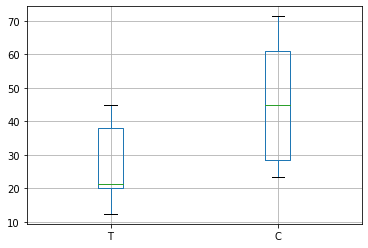

In [0]:
df1 = pd.DataFrame(data, columns=['T',	'C']) # You can create a dataframe by specifying the columns you want 
df1.boxplot()

## Histogram

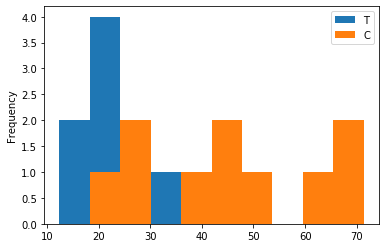

In [0]:
df1 = pd.DataFrame(data, columns=['T', 'C'])
df1.plot.hist()

## Density plot

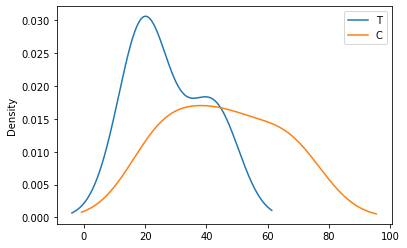

In [0]:
df1.plot.kde()

## Bar Plot
(for the mean)

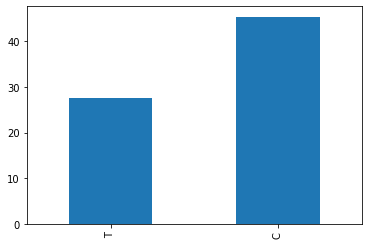

In [0]:
df1 = df1.mean()
df1.plot.bar()

For other plots, visit Pandas's documentation to see how to create them.   
Documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html



---

**Questions, comments, suggestions**:  
Go to the Github page and open a new issue. https://github.com/ytyfeng/data-analysis/issues    




© 2019 [Ty Feng](http://tyfeng.com/)